# Move the Data to Pandas

In [1]:
import sys
sys.path.insert(0, '../../modules')
%pylab inline
from pprint import pprint
from tracking import HoughSpace
from scipy import sparse
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.ticker as mtick
from hits import CyDetHits, CTHHits, CDCHits, FlatHits
import data_tools as dts
import visualizations as viz
from root_numpy import list_branches, list_trees
from collections import OrderedDict

Populating the interactive namespace from numpy and matplotlib


/home/five4three2/development/miniconda3/envs/tfy3_again/lib/python3.6/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.14.3 is currently installed but you installed root_numpy against numpy 1.12.1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
a_file = "/home/five4three2/development/ICEDUST/track-finding-yandex"+\
         "/data/MC4q/8e6_pot/bunch_train_6/root/MC4q_bkg_f5_b6_t-100_2000.root"

In [3]:
all_branches = OrderedDict()
# Get the two hit trees
trees = [tree for tree in list_trees(a_file) if "Hit" in tree]
# Get the branches for each tree
for tree in trees:
    branches = [branch for branch in list_branches(a_file, treename=tree)]
    for filter_br in ["CDCHit.fDetectedTime",
                      "CDCHit.fCharge",
                      "CDCHit.fEventNumber",
                      "CDCHit.fIsSig",
                      'CTHHit.fMCPos.fE',
                      'CTHHit.fCharge',
                      'CTHHit.fEventNumber',
                      'CTHHit.fIsSig']:
        branches = [branch for branch in branches if filter_br not in branch]
    all_branches[tree[:3]] = branches
print(trees)

['CDCHitTree', 'CTHHitTree']


TClass::Init:0: RuntimeWarning: no dictionary for class COMET::ICOMETEvent is available
TClass::Init:0: RuntimeWarning: no dictionary for class COMET::IDataVector is available
TClass::Init:0: RuntimeWarning: no dictionary for class COMET::IData is available
TClass::Init:0: RuntimeWarning: no dictionary for class COMET::IDatum is available
TClass::Init:0: RuntimeWarning: no dictionary for class COMET::ICOMETContext is available
TClass::Init:0: RuntimeWarning: no dictionary for class COMET::ISHAHashValue is available
TClass::Init:0: RuntimeWarning: no dictionary for class COMET::IAlignmentId is available
TClass::Init:0: RuntimeWarning: no dictionary for class COMET::ICOMETEvent::Header is available


In [4]:
flat_hits = CDCHits(a_file, trees[0], first_event=0, n_events=10, branches=all_branches["CDC"])


In [34]:
type(flat_hits.data[flat_hits.key_name])

pandas.core.series.Series

In [5]:
#flat_hits.data.index.unique(level=0)
evt_index = flat_hits.data.index.droplevel(level=1)
event_to_n_hits = evt_index.value_counts(sort=False).values
pprint(evt_index.value_counts(sort=False))
pprint(event_to_n_hits)
evt_index.values

0    1813
1    1942
2    1496
3    1628
4    1847
5    1890
6    1902
7    1841
8    2071
9    2030
Name: CDCHit.fevent_index, dtype: int64
array([1813, 1942, 1496, 1628, 1847, 1890, 1902, 1841, 2071, 2030])


array([0, 0, 0, ..., 9, 9, 9])

In [19]:
pprint(all_branches)

OrderedDict([('CDC',
              ['CDCHit.fDriftDist',
               'CDCHit.fDriftTime',
               'CDCHit.fTurnID',
               'CDCHit.fMCMom.fX',
               'CDCHit.fMCMom.fY',
               'CDCHit.fMCMom.fZ',
               'CDCHit.fTrack.fTrackID',
               'CDCHit.fTrack.fParentTrackID',
               'CDCHit.fTrack.fPID',
               'CDCHit.fTrack.fTags.fTagMaskPersisted',
               'CDCHit.fTrack.fTagsAsParent.fTagMaskPersisted',
               'CDCHit.fTrack.fTagsAsDaughter.fTagMaskPersisted',
               'CDCHit.fTrack.fStartMomentum.fX',
               'CDCHit.fTrack.fStartMomentum.fY',
               'CDCHit.fTrack.fStartMomentum.fZ',
               'CDCHit.fTrack.fStopMomentum.fX',
               'CDCHit.fTrack.fStopMomentum.fY',
               'CDCHit.fTrack.fStopMomentum.fZ',
               'CDCHit.fTrack.fStartPosGlobal.fP.fX',
               'CDCHit.fTrack.fStartPosGlobal.fP.fY',
               'CDCHit.fTrack.fStartPosGlobal.fP.fZ',

In [15]:
flat_hits.data.groupby([flat_hits.event_index_name, flat_hits.flat_name]).head(1)[[flat_hits.time_name, flat_hits.flat_name]]

CDCHit.fDetectedTime  CDCHit.fChannel
CDCHit.fevent_index CDCHit.fhits_index                                       
0                   0                              -3.490135              376
                    1                              -0.396178             2960
                    2                               3.277798             2957
                    3                              11.443030             3229
                    4                              33.551594             2959
                    5                              43.610027             3788
                    6                              44.969376             3246
                    7                              51.962334             1077
                    8                              52.397995             3785
                    9                              52.835888             3510
                    10                             52.945534             3506
                    11                             52.987396             3790
                    12                             53.518112             3508
                    13                             54.266003             3511
                    14                             59.504841             4083
                    15                             59.574646             2958
                    16                             63.657539             3505
                    17                             66.019882             3787
                    18                             70.485970             3784
                    19                             71.515907             3507
                    20                             72.567322              364
                    22                             79.130829             3712
                    23                             85.768196             3786
                    24                             86.487236              386
                    25                             92.329163             3789
                    26                             94.022797             2831
                    27                             95.070091              902
                    28                             96.288689              900
                    29                             96.578331              901
                    30                             96.804749             3783
...                                                      ...              ...
9                   1987                         2211.039062              787
                    1988                         2211.227783             2934
                    1989                         2231.551270             1368
                    1990                         2237.239746             2590
                    1991                         2238.104004             1478
                    1992                         2239.184082             1366
                    1993                         2242.184814             4135
                    1994                         2252.727051              265
                    1996                         2260.294678             2594
                    1997                         2265.957764             3568
                    1998                         2282.393066              989
                    1999                         2289.226562             1050
                    2000                         2296.132324             1535
                    2001                         2297.124512             2527
                    2003                         2304.621338             1369
                    2004                         2319.079102             3842
                    2006                         2320.663330             4383
                    2010                         2340.120605             1882
                    2012                         2352.158447  

In [18]:
flat_hits.sort_hits([flat_hits.flat_name, flat_hits.time_name])
flat_hits.data.groupby([flat_hits.event_index_name, flat_hits.flat_name]).head(1)[[flat_hits.time_name, flat_hits.flat_name]].sort_values(flat_hits.time_name)

CDCHit.fDetectedTime  CDCHit.fChannel
CDCHit.fevent_index CDCHit.fhits_index                                       
8                   238                           -98.633659              485
3                   210                           -93.880676              502
8                   370                           -93.256554              695
7                   735                           -88.238205             1668
                    736                           -87.539085             1669
                    737                           -84.561371             1670
                    734                           -84.345062             1667
                    738                           -80.481888             1671
3                   132                           -79.263672              288
2                   704                           -75.817230             2023
7                   354                           -73.549500              710
2                   660                           -65.090683             1908
                    1089                          -57.051422             3191
7                   826                           -56.248276             1916
                    812                           -52.042953             1870
3                   963                           -51.791882             2565
7                   143                           -48.979061              291
8                   240                           -48.895660              486
7                   1774                          -47.462936             4312
3                   919                           -45.079853             2474
7                   1412                          -44.009686             3451
                    537                           -42.795475             1153
3                   33                            -41.384655               95
7                   39                            -41.010365               98
2                   1272                          -38.620468             3773
                    813                           -38.519981             2413
                    325                           -36.805450              860
3                   1223                          -33.814014             3382
2                   432                           -33.369698             1188
4                   1599                          -29.020798             3897
...                                                      ...              ...
8                   1403                         2791.209473             2888
1                   1303                         2798.362793             2790
5                   902                          2801.701416             1964
1                   1419                         2811.971191             3136
5                   132                          2812.899902              291
7                   441                          2814.818848              933
1                   1018                         2819.156250             2178
                    776                          2837.900879             1706
                    1818                         2857.313721             4153
7                   1463                         2857.526123             3577
5                   553                          2874.262207             1181
1                   1683                         2878.909668             3801
6                   1567                         2880.249023             3600
4                   1633                         2887.561035             3982
9                   1793                         2892.108398             3823
0                   947                          2911.964355             2128
2                   879                          2921.525879             2568
                    312                          2935.332031              827
5                   1801                         2950.037598  

In [31]:
import pandas as pd
pd.__version__

'0.23.4'

In [ ]:
sample = dts.data_import_file(a_file, signal=False, use_cuts=None, branches=all_branches)
p

Size 2565 MB
Size 247 MB


(array([1068231., 1282546., 1807803., 2054259., 2288310., 2383410.,
        2322377., 2160739., 1461010., 1227389.]),
 array([5622.5859375, 5780.06875  , 5937.5515625, 6095.034375 ,
        6252.5171875, 6410.       , 6567.4828125, 6724.965625 ,
        6882.4484375, 7039.93125  , 7197.4140625]),
 <a list of 10 Patch objects>)

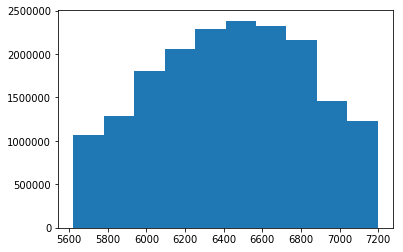

In [30]:
print("Size %d MB" % (sys.getsizeof(sample.cdc.data)/MB) )
print("Size %d MB" % (sys.getsizeof(sample.cth.data)/MB) )

plt.hist(sample.cdc.get_events()["CDCHit.fMCPos.fP.fX"])

In [6]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
#8.1 GB, 2.6 GB